In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.constants as const



In [218]:
# Schottky current due to thermal. from svennson
#thermal voltage, defined as Kb*T/e
VT=300*const.Boltzmann/const.elementary_charge
richardson_const=4*np.pi*const.electron_mass*const.elementary_charge*const.Boltzmann**2/const.h**3




0.025851991011651636 38.681740201336694


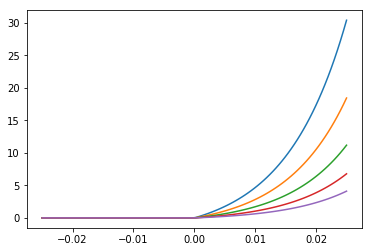

In [230]:
def simple_exp(vd,vg):
    offset=1e-12
    C=1
    alpha=0.1
    beta=100
    if vd<=0:
        return offset
    else:
        return C*((np.exp(-vg*alpha))*(np.exp(beta*vd)-1+offset))
    
x=np.linspace(-0.025,0.025,100)
for vg in [-10,-5,0,5,10]:
    plt.plot(x,[simple_exp(i,vg)for i in x])
#     plt.plot(x,[simple_quad(i,vg)for i in x],color='b')
print(VT,1/VT)

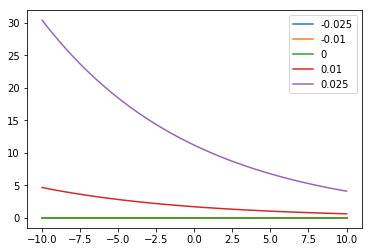

In [228]:
x=np.linspace(-10,10,100)
for vd in [-0.025,-0.01,0,0.01,0.025]:
    plt.plot(x,[simple_exp(vd,i)for i in x],label=vd)
plt.legend()

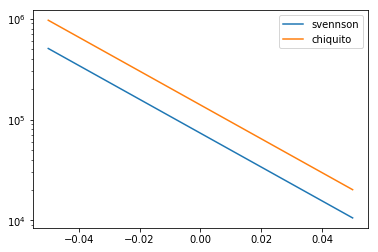

In [117]:

def svennson_current_density(vd,vg,sb0=0.45,n=1.2):
    # 1<n<2 ideality factor. 1 for ideal. 1.2 limit of thermal 
    # Jsat =AA*T^2 exp(-SBe/VT)
    
    sb0=sb0+vg
    sbe=sb0
    Jsat = richardson_const*300**2*np.exp((-sbe)/VT)
    J = Jsat*np.exp(vd/(n*VT))*(1-np.exp(-vd/VT))
    return J
def chiquito_current_density(vd,vg,sb0=0.45,n=1.2):
    # 1<n<2 ideality factor. 1 for ideal. 1.2 limit of thermal 
    # Jsat =AA*T^2 exp(-SBe/VT)
    sb0=sb0+vg
    sbe=sb0+vd*(1/n-1)
    Jsat = richardson_const*300**2*np.exp((-sbe)/VT)
    J = Jsat*np.exp(vd/(n*VT))*(1-np.exp(-vd/VT))
    return J 

vds=0.1
vg=0.05
x=np.linspace(-vg,vg,100)
y_svennson=[svennson_current_density(vds,i) for i in x]
y_chiquito=[chiquito_current_density(vds,i) for i in x]
plt.semilogy(x,y_svennson, label="svennson")
plt.semilogy(x,y_chiquito, label="chiquito")
plt.legend()

1.0 0.9980019986673331


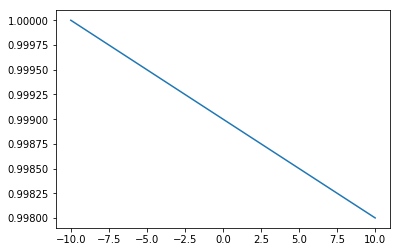

In [285]:
def lin_exp(vd,vg):
    alpha=.0001
    # normalizes conduction at 1 for -10
    normalization=np.exp(-10*alpha)#
    return np.exp(-alpha*vg)*normalization
x=np.linspace(-10,10,100)
y=[lin_exp(0.1,i)for i in x]
plt.plot(x,y)
print(max(y),min(y))

In [282]:
np.random.seed(1)
np.random.rand()

0.417022004702574